# Data Exploration

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shelter = gpd.read_file('dataset/BD_Cyclone_Shelter_Center.geojson')
shelter.head()

,ShelterNam,Capacity,Lat,Long,geometry
0,Zinzira gprs cum shelter.,1500.0,20.5924,92.3312,POINT (92.33118 20.59243)
1,Sentmartin puratan cyclone center,1200.0,20.6322,92.3247,POINT (92.32471 20.6322)
2,Shah Porir Dwip GPS,1500.0,20.7657,92.3347,POINT (92.33471 20.76571)
3,Dangar Para Red Cresent RPS,850.0,20.7673,92.3227,POINT (92.32271 20.76732)
4,24 no Shahp Darir Dwip Jaliapara GPS,1500.0,20.7807,92.3380,POINT (92.33801 20.78072)


In [3]:
print('Max Capacity: ', shelter['Capacity'].max())
print('Min Capacity: ', shelter['Capacity'].min())
print('Total no. of shelters: ', shelter.shape[0])
print('Total capacity of shelters (in million): ', round(shelter['Capacity'].sum()/1e6, 1))

# print('Total capacity of shelters in Feni (in million): ', round(shelter.loc[shelter['Category'] == 'A', 'Revenue'].sum() ))



Max Capacity:  2500.0
Min Capacity:  0.0
Total no. of shelters:  3777
Total capacity of shelters (in million):  3.8


In [4]:
gdf_map = gpd.read_file('dataset/bangladesh_geojson_adm2_64_districts_zillas.json')
gdf_map = gdf_map.rename(columns={'ADM2_EN': 'District'})
# selected districts
selected_districts = ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur', 
                      'Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram',
                      'Habiganj', 'Moulvibazar']

gdf_map['selected_district'] = gdf_map['District'].apply(lambda x: x if x in selected_districts else np.nan)


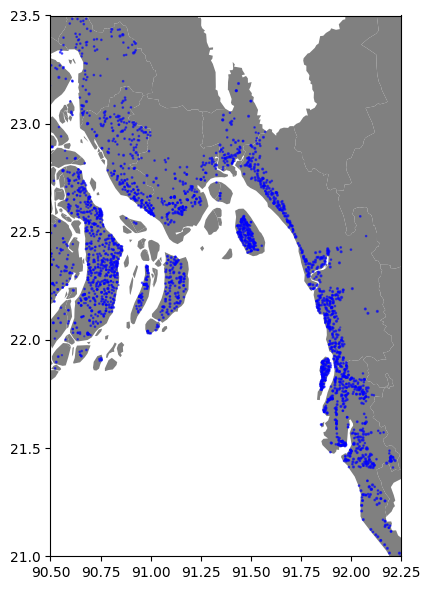

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))

gdf_map.plot(ax=ax, color='gray') # color=gdf['color']

shelter.plot(
    ax=ax,                # Size of the plot
    marker='o',                      # Marker type
    markersize=shelter['Capacity']/1000,   # Size based on the column
    color='blue',                    # Color of the markers
    alpha=0.6,                       # Transparency level
)


ax.set_xlim(90.5, 92.25)
ax.set_ylim(21, 23.5)



plt.tight_layout()
plt.savefig('plots/shelters.svg', format='svg')
plt.show()


## Feni

In [22]:
one_district = gdf_map[gdf_map['selected_district'] == 'Feni']
one_district

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry,selected_district
15,2.949855,0.079876,Feni,BD2030,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((91.3311 22.8175, 91.32814 22.7...",Feni


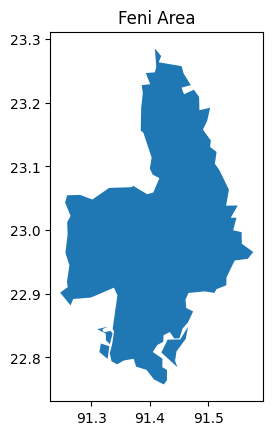

In [18]:
selected_polygon = one_district.geometry

# Filter gdf_points where points are within the selected_polygon
points_within = shelter.geometry[shelter.geometry.within(selected_polygon)]

# Plot the result to visualize
ax = one_district.plot(color='lightblue', edgecolor='black')
points_within.plot(ax=ax, color='red')
plt.title('Points within Central District')
plt.show()

/var/folders/xd/bkg103js7ms2lvxxhsmqkz5r0000gn/T/ipykernel_1466/1389764548.py:4: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  points_within = shelter.geometry[shelter.geometry.within(selected_polygon)]


ValueError: aspect must be finite and positive 

In [34]:
def check_within(point, polygons):
    """Check if a point is within any of the given polygons."""
    return any(point.within(polygon) for polygon in polygons.geometry)

shelter['within_area'] = shelter.geometry.apply(lambda x: check_within(x, one_district))

# Filter points that are within any area
points_within_areas = shelter[shelter['within_area']]
points_within_areas

points_within_areas['markersize'] = points_within_areas['Capacity'] / 80  

/Users/tanmoydas/Applications/anaconda3/envs/Freelancing/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


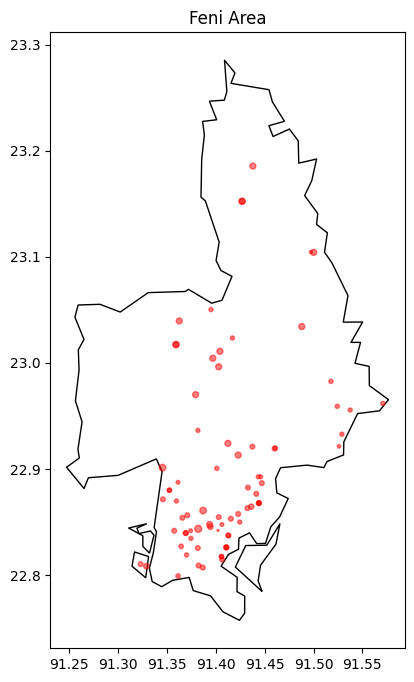

## Road network

In [ ]:
road_gdf = gpd.read_file('dataset/bgd_trs_roads_lged/bgd_trs_roads_lged.shp')
display(road_gdf.head())
print(road_gdf['FType'].unique())
# display(road_gdf.head())
condition1 = road_gdf['District'] == 'Feni'
condition2 = road_gdf['FType']=='National Highway'
feni_road_national_highway_gdf = road_gdf[condition1 & condition2]
#feni_road_national_highway_gdf
condition3 = road_gdf['FType']=='Regional Highway'
feni_road_regional_highway_gdf = road_gdf[condition1 & condition3]

condition4 = road_gdf[road_gdf['FType'].isin(['National Highway', 'Regional Highway', 'Upazila Road', 'Zila Road'])]
# Correct usage with a list

#df[df['Category'].isin(values_to_match)]
feni_road_gdf = road_gdf[(condition1 & condition4)]

,RD_COND,COND_WS,TOTLENGTH,CRESTWIDTH,LGEDcode,FType,RoadType,RoadName,Division,District,Upazila,Shape_Leng,geometry
0,None,VILLAGE A_KATCHA,4.75,2.00,4016,Village Road A,Katcha,Asanullah Diggi-Baripayka Natun hat via Rarok ...,Barisal,Barisal,Agailjhara,384.636784,"LINESTRING (90.20268 22.90076, 90.20362 22.900..."
1,None,VILLAGE B_KATCHA,4.00,1.82,5009,Village Road B,Katcha,Chaygram hat to solok U.P. border via kazi A. ...,Barisal,Barisal,Agailjhara,138.039739,"LINESTRING (90.20128 22.90173, 90.20126 22.90048)"
2,None,VILLAGE A_KATCHA,4.75,2.00,4016,Village Road A,Katcha,Asanullah Diggi-Baripayka Natun hat via Rarok ...,Barisal,Barisal,Agailjhara,180.040854,"LINESTRING (90.20128 22.90173, 90.20144 22.901..."
3,None,VILLAGE B_KATCHA,3.50,1.50,5010,Village Road B,Katcha,Sholok U.P. border to Thaneswarkati road.,Barisal,Barisal,Agailjhara,258.446964,"LINESTRING (90.19909 22.90213, 90.20033 22.901..."
4,None,VILLAGE B_KATCHA,4.00,1.82,5009,Village Road B,Katcha,Chaygram hat to solok U.P. border via kazi A. ...,Barisal,Barisal,Agailjhara,334.239172,"LINESTRING (90.20186 22.90467, 90.20164 22.903..."


['Village Road A' 'Village Road B' 'Union Road' 'Upazila Road' 'Zila Road'
 'Regional Highway' 'National Highway']


/var/folders/xd/bkg103js7ms2lvxxhsmqkz5r0000gn/T/ipykernel_1466/1268200647.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


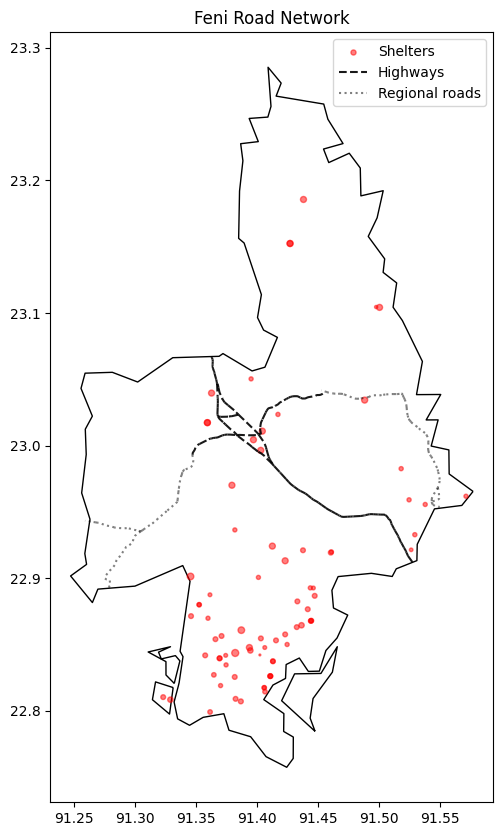

In [54]:
# Plot the selected area
ax = one_district.plot(figsize=(10, 10), color='white', edgecolor='black',  label='District boundary')
points_within_areas.plot(ax=ax, color='red', markersize='markersize', alpha=0.5,  label='Shelters')
# Add title and other plot customizations if desired

# Plot the GeoDataFrame
feni_road_national_highway_gdf.plot(ax=ax, edgecolor='black', linestyle='--', alpha=0.9,  label='Highways')
feni_road_regional_highway_gdf.plot(ax=ax, edgecolor='black', linestyle=':', alpha=0.5,  label='Regional roads')

ax.set_title('Feni Road Network')
plt.legend()
plt.savefig('plots/Feni road network.svg')
plt.show()


# Feature Engineering